## :one: Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import spacy
from wordcloud import WordCloud
from spacy import displacy
from ydata_profiling import ProfileReport
%matplotlib inline


## :two: Loading Twitter Sentiment dataset:

In [2]:
# Loading Twitter dataset

df = pd.read_csv('socialsentiment.csv', encoding='latin-1')

## :three: Dealing with timezones

##### The code below will first remove the timezone and convert it to datetime. We then localize the timezone to 'America/Los_Angeles' for PDT.

```python
df['date'] = df['date'].str.replace(r'PDT', '', regex=True).str.strip()

df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S %Y')

df['date'] = df['date'].dt.tz_localize('America/Los_Angeles')

print(df.head())
```


In [3]:
# During initial loading of the dataset there weren't any column names
# Column names are now added

df.columns = ['target', 'ids', 'date', 'user', 'text']
print(df.head())

   target         ids                       date           user  \
0       0  1467810672  2009-04-06 22:19:49-07:00  scotthamilton   
1       0  1467810917  2009-04-06 22:19:53-07:00       mattycus   
2       0  1467811184  2009-04-06 22:19:57-07:00        ElleCTF   
3       0  1467811193  2009-04-06 22:19:57-07:00         Karoli   
4       0  1467811372  2009-04-06 22:20:00-07:00       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


In [4]:
# List only the column names in the DataFrame

list(df.columns)

['target', 'ids', 'date', 'user', 'text']

In [5]:
# This function will display the first 5 rows in the dataset

df.head()

,target,ids,date,user,text
0,0,1467810672,2009-04-06 22:19:49-07:00,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,2009-04-06 22:19:53-07:00,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,2009-04-06 22:19:57-07:00,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,2009-04-06 22:19:57-07:00,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,2009-04-06 22:20:00-07:00,joy_wolf,@Kwesidei not the whole crew


In [6]:
# This function will display the last 5 rows in the dataset

df.tail()

,target,ids,date,user,text
1599994,4,2193601966,2009-06-16 08:40:49-07:00,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,2009-06-16 08:40:49-07:00,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,2009-06-16 08:40:49-07:00,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,2009-06-16 08:40:49-07:00,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,2009-06-16 08:40:50-07:00,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [7]:
profile = ProfileReport(df, title="Sentiment Analysis")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# This code exports a DataFrame to a CSV file called socialsentiment.csv

df.to_csv('socialsentiment.csv', index=False, encoding='latin-1')

In [9]:
# This method will return all description of the data in the DataFrame

df.describe(include='all')

,target,ids,date,user,text
count,1.599999e+06,1.599999e+06,1599999,1599999,1599999
unique,NaN,NaN,774362,659775,1581465
top,NaN,NaN,2009-06-15 12:53:14-07:00,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,549,210
mean,2.000001e+00,1.998818e+09,NaN,NaN,NaN
std,2.000001e+00,1.935757e+08,NaN,NaN,NaN
min,0.000000e+00,1.467811e+09,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN
50%,4.000000e+00,2.002102e+09,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN


In [10]:
# This code checks if data is missing from the dataset and there is no data is missing

df.isnull().sum()

target    0
ids       0
date      0
user      0
text      0
dtype: int64

In [11]:
# This code checks that data type of each column in the DataFrame

df.dtypes

target     int64
ids        int64
date      object
user      object
text      object
dtype: object

In [12]:
# This method print information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   user    1599999 non-null  object
 4   text    1599999 non-null  object
dtypes: int64(2), object(3)
memory usage: 61.0+ MB


## :four: Pie chart

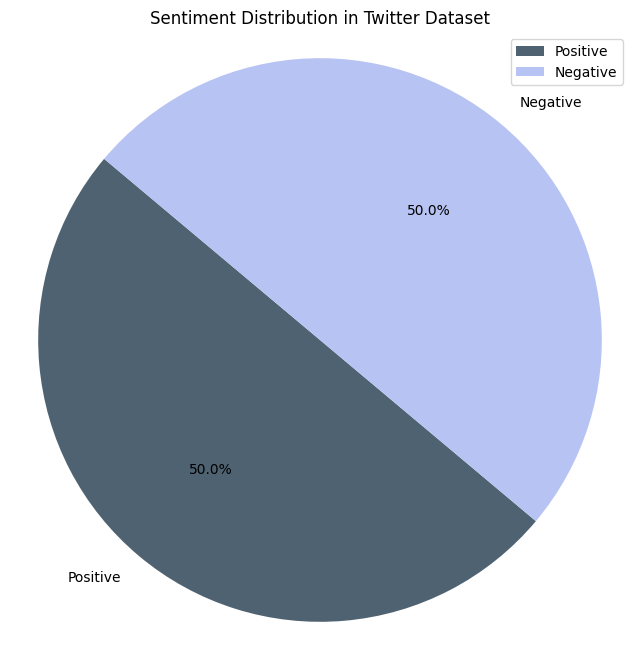

In [13]:
# The pie chart is created and maps the numeric values to their corresponding sentiment labels

sentiment_mapping = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}
df['sentiment_label'] = df['target'].map(sentiment_mapping)

sentiment_counts = df['sentiment_label'].value_counts()
colors = ['#4F6272', '#B7C3F3']

plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors = colors, startangle=140);
plt.title('Sentiment Distribution in Twitter Dataset')
plt.axis('equal')
plt.legend()
plt.show();

In [14]:
# Checking the number of neutral tweets

neutral_tweet_count = df[df['target'] == 2].shape[0]
print(f'Number of neutral tweets: {neutral_tweet_count}')

Number of neutral tweets: 0


## :five: Bar chart

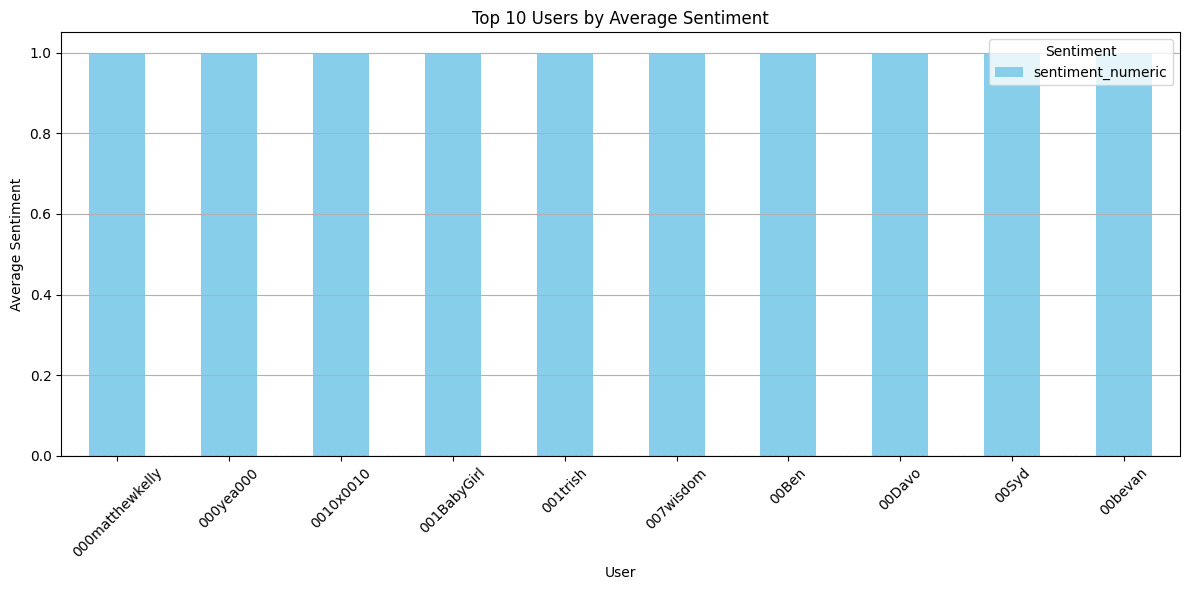

In [15]:
# The bar chart is created and displays the Top 10 users with the highest average sentiment.

sentiment_numeric = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['sentiment_numeric'] = df['sentiment_label'].map(sentiment_numeric)

user_sentiment = df.groupby('user')['sentiment_numeric'].mean()

top_users = user_sentiment.nlargest(10)

plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', color='skyblue')
plt.title('Top 10 Users by Average Sentiment')
plt.xlabel('User')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.axhline(0, color='red', linewidth=0.8, linestyle='--')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

:thought_balloon: Thoughts: Based on the bar chart for the top 10 users by average sentiment, this shows me who the top 10 users in this dataset are. I can see exactly which users they are because each username is displayed.

## :six: Bar chart for number of positive tweets

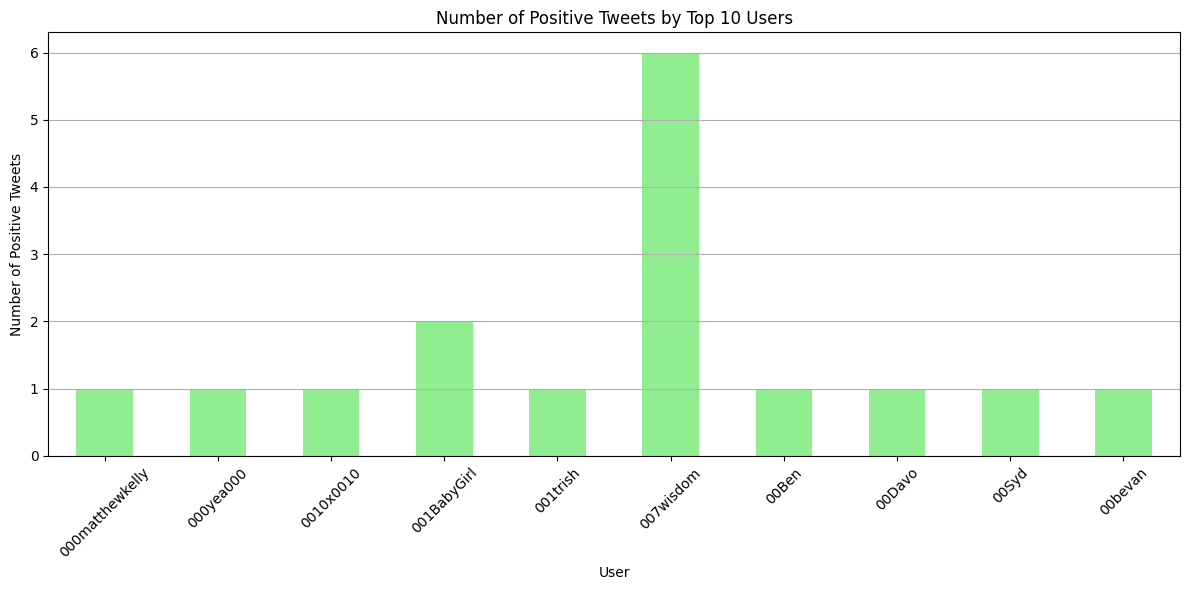

In [16]:
#Positive Engagement Analysis

top_users = user_sentiment.nlargest(10).index

top_user_tweets = df[df['user'].isin(top_users)]

#Count positive tweets for each user

positive_tweet_counts = top_user_tweets[top_user_tweets['sentiment_label'] == 'Positive'].groupby('user').size()

# Bar chart for Positive Engagement

plt.figure(figsize=(12, 6))
positive_tweet_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Positive Tweets by Top 10 Users')
plt.xlabel('User')
plt.ylabel('Number of Positive Tweets')
plt.xticks(rotation=45)
#plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

:thought_balloon: Thoughts: Based on the bar chart for the number of positive tweets by the top 10 users, this shows me which users have the highest number of positive tweets. The users with the usernames 007wisdom and 001BabyGirl have the highest counts of positive tweets therefore, i will analyze those two users.

In [17]:
# Analyze all six tweets user '007wisdom' posted

search_value = '007wisdom'
result = df[df['user'] == search_value]
result

,target,ids,date,user,text,sentiment_label,sentiment_numeric
879865,4,1685535486,2009-05-03 00:50:08-07:00,007wisdom,&quot;All that we are is the result of what we...,Positive,1
889032,4,1687496734,2009-05-03 08:51:09-07:00,007wisdom,&quot;All that we are is the result of what we...,Positive,1
951488,4,1824247256,2009-05-17 00:35:36-07:00,007wisdom,'Time Is An Illusion and All Time Is Now'... &...,Positive,1
953750,4,1824711167,2009-05-17 02:35:28-07:00,007wisdom,'Time Is An Illusion and All Time Is Now'... &...,Positive,1
984035,4,1834348688,2009-05-18 02:35:37-07:00,007wisdom,'Time Is An Illusion and All Time Is Now'... &...,Positive,1
995445,4,1835719548,2009-05-18 06:36:33-07:00,007wisdom,'Time Is An Illusion and All Time Is Now'... &...,Positive,1


In [18]:
# Analyze two tweets from user '001BabyGirl' 

search_value = '001BabyGirl'
result = df[df['user'] == search_value]
result

,target,ids,date,user,text,sentiment_label,sentiment_numeric
905645,4,1695163738,2009-05-04 05:23:34-07:00,001BabyGirl,@ianvisagie Why???,Positive,1
1048228,4,1958125115,2009-05-29 02:44:49-07:00,001BabyGirl,Is going to Stone featherbrook tonight Tis me...,Positive,1


:thought_balloon: Now since I want to look further into both users 007wisdom and 001BabyGirl, I got to see what each user tweeted which will help me later in visualizing each word used that is labeled as positive for these specific users.

## :seven: Word Cloud

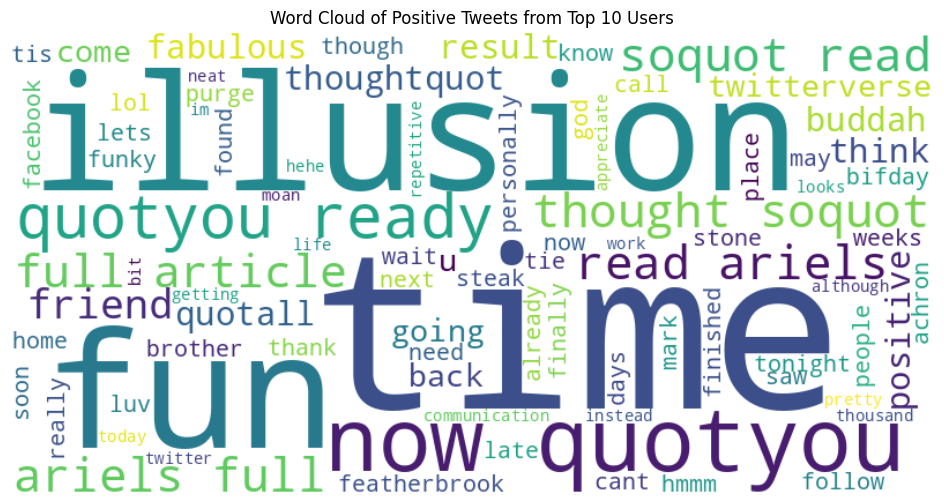

In [19]:
# Content Analysis

# Extract positive tweets
positive_tweets_text = top_user_tweets[top_user_tweets['sentiment_label'] == 'Positive']['text']

# Clean and preprocess the tweet text
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    return text.lower()  # Convert to lowercase

cleaned_tweets = positive_tweets_text.apply(clean_text)

# Combine all cleaned tweets into a single string
all_positive_tweets = ' '.join(cleaned_tweets)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_tweets)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Positive Tweets from Top 10 Users')
plt.show()

:thought_balloon: This is a wordcloud of positive words shown from the tweets. The size of each word indicates its frequency or importance. 

## :eight: The specific NLTK packages are downloaded

```python
import nltk
nltk.download('punkt')       # For tokenizers
nltk.download('wordnet')     # For lemmatization
nltk.download('stopwords')   # For stopword removal
```

In [20]:
# This prints a tweet from the first row under column "text"
print(df['text'].loc[df.index[0]])

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


## :nine: The spaCy model is loaded

In [21]:
# This loads the en_core_web_md pretrained model from spaCy

nlp = spacy.load("en_core_web_md")

In [22]:
# This code takes a specific tweet from index 0 in the dataset, and then passes
# it to the model for processing.
# Additionally, it performs all three operations which are Tokenization, Lemmatization, and Parts of Speech.
# Tokenization consist of splitting text into individual words(tokens) and
# allows you to analyze word frequencies, patterns, or relationships between words.
# Lemmatization refers to more of reducing the words to its base dictionary 
# form instead of chopping off parts of the words like Stemmming
# Parts of Speech refers to grammatical categories that words in a sentence belong to, such as nouns,
# verbs, adjectives, etc.

tweet = df['text'].iloc[0]
doc = nlp(tweet)

for token in doc:
    print(f"token: {token.text}, Lemma: {token.lemma_}, POS: {token.pos_}")

token: is, Lemma: be, POS: AUX
token: upset, Lemma: upset, POS: ADJ
token: that, Lemma: that, POS: SCONJ
token: he, Lemma: he, POS: PRON
token: ca, Lemma: can, POS: AUX
token: n't, Lemma: not, POS: PART
token: update, Lemma: update, POS: VERB
token: his, Lemma: his, POS: PRON
token: Facebook, Lemma: Facebook, POS: PROPN
token: by, Lemma: by, POS: ADP
token: texting, Lemma: texte, POS: VERB
token: it, Lemma: it, POS: PRON
token: ..., Lemma: ..., POS: PUNCT
token: and, Lemma: and, POS: CCONJ
token: might, Lemma: might, POS: AUX
token: cry, Lemma: cry, POS: VERB
token: as, Lemma: as, POS: ADP
token: a, Lemma: a, POS: DET
token: result, Lemma: result, POS: NOUN
token:  , Lemma:  , POS: SPACE
token: School, Lemma: School, POS: PROPN
token: today, Lemma: today, POS: NOUN
token: also, Lemma: also, POS: ADV
token: ., Lemma: ., POS: PUNCT
token: Blah, Lemma: Blah, POS: PROPN
token: !, Lemma: !, POS: PUNCT


## :keycap_ten: Entities

In [23]:
# This code is used to visualize the entities.

displacy.render(doc, style="ent")

In [24]:
# NER known as Named Entity Recognition will take the processed tweet above
# and classify the entity.

for ent in doc.ents:
    print(f"Entity: {ent.text}, label: {ent.label_}")

Entity: Facebook, label: ORG
Entity: today, label: DATE


In [25]:
# Dependency Parser

for token in doc:
    print(f"Token: {token.text}, Dependency: {token.dep_}, Head: {token.head.text}")

Token: is, Dependency: ROOT, Head: is
Token: upset, Dependency: acomp, Head: is
Token: that, Dependency: mark, Head: update
Token: he, Dependency: nsubj, Head: update
Token: ca, Dependency: aux, Head: update
Token: n't, Dependency: neg, Head: update
Token: update, Dependency: ccomp, Head: upset
Token: his, Dependency: poss, Head: Facebook
Token: Facebook, Dependency: dobj, Head: update
Token: by, Dependency: prep, Head: update
Token: texting, Dependency: pcomp, Head: by
Token: it, Dependency: dobj, Head: texting
Token: ..., Dependency: punct, Head: is
Token: and, Dependency: cc, Head: is
Token: might, Dependency: aux, Head: cry
Token: cry, Dependency: conj, Head: is
Token: as, Dependency: prep, Head: cry
Token: a, Dependency: det, Head: School
Token: result, Dependency: compound, Head: School
Token:  , Dependency: dep, Head: result
Token: School, Dependency: pobj, Head: as
Token: today, Dependency: npadvmod, Head: cry
Token: also, Dependency: advmod, Head: cry
Token: ., Dependency: pun